In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.shape

(11665, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
df[df['V12'].isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11664,19915,1.504229,-0.499337,0.052377,-0.576345,-0.393971,0.015149,-0.718603,-0.125852,1.023281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Removing Null data
df.dropna(axis=0, inplace=True)
df.shape

(11664, 31)

In [8]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df['Class'].value_counts()

Class
0.0    11615
1.0       49
Name: count, dtype: int64

In [10]:
print('Percentage of Frauds cases present= ', round(df['Class'].value_counts()[1.0]*100/df['Class'].shape[0], 3))

Percentage of Frauds cases present=  0.42


## <span style="color:magenta"> **Visualizations**

<Axes: xlabel='Class', ylabel='count'>

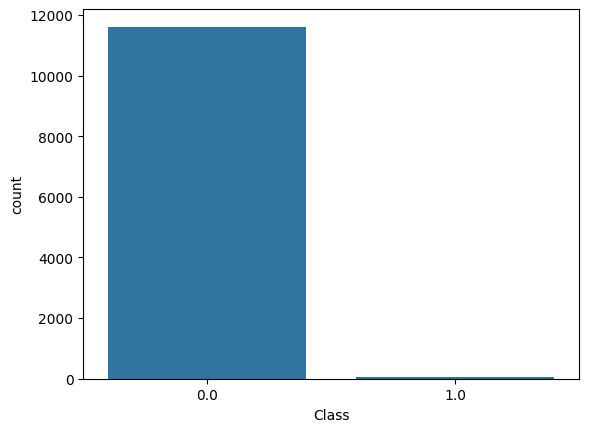

In [11]:
sns.countplot(data=df, x='Class')

### <span style="color:orange"> Highly Imbalanced Dataset

### <span style="color:red">Strategies for Dealing with Imbalanced Datasets:</span>

* <span style="color:lime">**Ensemble Techniques/Decision Tree/Random Forest:**</span> These methods involve using a combination of models to improve overall predictive performance.

* <span style="color:lime">**Undersampling:**</span> This technique involves reducing the number of instances of the majority class to match the minority class, preventing the model from being biased toward the majority class.

* <span style="color:lime">**Oversampling:**</span> In this approach, the instances of the minority class are increased to balance the class distribution and provide more information for the model to learn from.

* <span style="color:lime">**SMOTETomek:**</span> This is a combination of SMOTE (Synthetic Minority Over-sampling Technique) and Tomek links. It involves generating synthetic examples of the minority class using SMOTE and cleaning the resulting dataset using Tomek links to enhance the model's performance.


## <span style="color:magenta">**Ensemble Techniques/Decision Tree/Random Forest:**</span>

In [12]:
df_convert= df.copy()
df_convert.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [14]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()

df_convert['NormalizedAmount']= scalar.fit_transform(np.array(df['Amount']).reshape(-1, 1))
df_convert.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,NormalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.482873
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.334272
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.756668
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.337607
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.040014


In [15]:
df_convert.Time.value_counts()        

Time
3767     21
3770     20
19912    19
3750     19
3760     17
         ..
1540      1
7591      1
7590      1
1544      1
7474      1
Name: count, Length: 7682, dtype: int64

In [17]:
df_convert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11664 entries, 0 to 11663
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              11664 non-null  int64  
 1   V1                11664 non-null  float64
 2   V2                11664 non-null  float64
 3   V3                11664 non-null  float64
 4   V4                11664 non-null  float64
 5   V5                11664 non-null  float64
 6   V6                11664 non-null  float64
 7   V7                11664 non-null  float64
 8   V8                11664 non-null  float64
 9   V9                11664 non-null  float64
 10  V10               11664 non-null  float64
 11  V11               11664 non-null  float64
 12  V12               11664 non-null  float64
 13  V13               11664 non-null  float64
 14  V14               11664 non-null  float64
 15  V15               11664 non-null  float64
 16  V16               11664 non-null  float64
 17

In [18]:
X= df_convert.drop(columns=['Amount', 'Class'], axis=1)
y= df_convert['Class']

print(X.shape)
print(y.shape)

(11664, 30)
(11664,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### <span style="color:lime"> Decision Tree 

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
decisionTreeClassifier= DecisionTreeClassifier()
grid= {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
}

cv= KFold(n_splits=5, shuffle=False, random_state=None)

In [23]:
clf= GridSearchCV(decisionTreeClassifier, grid, cv=cv, n_jobs=1, scoring='accuracy')

In [24]:
clf.fit(X=X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [25]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [26]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}

In [27]:
clf.best_score_

0.9991426821800367

In [28]:
y_pred= clf.predict(X_test)

In [29]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.9982857142857143

In [30]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[3480,    4],
       [   2,   14]], dtype=int64)

In [32]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.78      0.88      0.82        16

    accuracy                           1.00      3500
   macro avg       0.89      0.94      0.91      3500
weighted avg       1.00      1.00      1.00      3500



#### <span style="color:lime"> Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf= RandomForestClassifier()

grid= {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth': [None, 10, 20, 30],
    # 'bootstrap': [True, False],
}

cv= KFold(n_splits=5, shuffle=False, random_state=None)

In [39]:
clf= GridSearchCV(rf, grid, cv=cv, n_jobs=1, scoring='accuracy')

In [40]:
clf.fit(X=X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [41]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

RandomForestClassifier()
{'criterion': 'gini', 'max_features': 'sqrt'}
0.9993876301285975


In [42]:
y_pred= clf.predict(X_test)

In [43]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.9991428571428571

In [44]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[3483,    1],
       [   2,   14]], dtype=int64)

In [45]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500



In [46]:
import pickle

In [47]:
s= pickle.dumps(clf)

In [48]:
clf2= pickle.loads(s)
clf2.predict(X[0:1])

array([0.])

In [49]:
from joblib import dump, load

In [50]:
dump(clf, 'credit_card_fraud_detection.joblib')

['credit_card_fraud_detection.joblib']

In [51]:
clf3 = load('credit_card_fraud_detection.joblib') 

In [52]:
clf3.predict(X[0:1])

array([0.])

## <span style="color:magenta">**Undersampling**</span>

Not particularly good for large datasets as there is a huge loss in dataset

In [54]:
# %pip install imbalanced-learn

In [56]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [57]:
ns= NearMiss(sampling_strategy=0.8)

X_train_ns, y_train_ns= ns.fit_resample(X= X_train, y= y_train)

print("The number of Class before the fit {}".format(Counter(y_train)))
print("The number of Class after the fit {}".format(Counter(y_train_ns)))

The number of Class before the fit Counter({0.0: 8131, 1.0: 33})
The number of Class after the fit Counter({0.0: 41, 1.0: 33})


In [59]:
classifier = RandomForestClassifier()       
classifier.fit(X_train_ns, y_train_ns)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))
print(accuracy_score(y_true=y_test, y_pred=y_pred)*100)

[[3475    9]
 [   1   15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.62      0.94      0.75        16

    accuracy                           1.00      3500
   macro avg       0.81      0.97      0.87      3500
weighted avg       1.00      1.00      1.00      3500

99.71428571428571


## <span style="color:magenta">**Oversampling**</span>

In [60]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
os= RandomOverSampler(sampling_strategy=0.75)
X_train_os, y_train_os = os.fit_resample(X = X_train, y = y_train)

print("The number of Class before the fit {}".format(Counter(y_train)))
print("The number of Class after the fit {}".format(Counter(y_train_os)))

The number of Class before the fit Counter({0.0: 8131, 1.0: 33})
The number of Class after the fit Counter({0.0: 8131, 1.0: 6098})


In [63]:
classifier = RandomForestClassifier()        
classifier.fit(X_train_os, y_train_os)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))
print(accuracy_score(y_true=y_test, y_pred=y_pred)*100)

[[3483    1]
 [   2   14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500

99.91428571428571


## <span style="color:magenta">**SMOTETomek**</span>

In [64]:
from imblearn.combine import SMOTETomek

In [65]:
st = SMOTETomek()
X_train_st, y_train_st = st.fit_resample(X = X_train, y = y_train)
print("The number of Class before the fit {}".format(Counter(y_train)))
print("The number of Class after the fit {}".format(Counter(y_train_st)))

The number of Class before the fit Counter({0.0: 8131, 1.0: 33})
The number of Class after the fit Counter({0.0: 8110, 1.0: 8110})


In [66]:
classifier = RandomForestClassifier()        
classifier.fit(X_train_st, y_train_st)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))
print(accuracy_score(y_true=y_test, y_pred=y_pred)*100)

[[3482    2]
 [   2   14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.88      0.88      0.88        16

    accuracy                           1.00      3500
   macro avg       0.94      0.94      0.94      3500
weighted avg       1.00      1.00      1.00      3500

99.88571428571429
